# The World Tour of '99: The Data Detective
# Machine Learning task - Coding Club IIT-G

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Data Cleaning

In [2]:
train_df = pd.read_csv("tour_logs_train.csv")

In [3]:
train_df.head()

,Gig_ID,Venue_ID,Show_DateTime,Day_of_Week,Volume_Level,Ticket_Price,Crowd_Size,Opener_Rating,Weather,Moon_Phase,Band_Outfit,Merch_Sales_Post_Show,Crowd_Energy
0,Gig_0000,V_Alpha,2024-03-07 21:00:00,3,5.0,52.93,464.0,2,Rainy,Waning Crescent,Leather,916,64.96
1,Gig_0001,V_Beta,2024-09-05 22:00:00,3,2.0,66.33,388.0,5,Clear,New Moon,Leather,1003,66.42
2,Gig_0002,V_Delta,2024-03-09 15:00:00,5,1.0,51.37,679.0,1,Rainy,Waning Crescent,Denim,720,42.58
3,Gig_0003,V_Beta,08/07/2024 08:00 AM,0,10.0,64.77,454.0,1,Rainy,New Moon,Leather,0,0.00
4,Gig_0004,V_Delta,2024-04-26 17:00:00,4,8.0,47.34,654.0,5,Cloudy,Full Moon,Spandex,950,67.55


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gig_ID                 2000 non-null   object 
 1   Venue_ID               2000 non-null   object 
 2   Show_DateTime          2000 non-null   object 
 3   Day_of_Week            2000 non-null   int64  
 4   Volume_Level           1819 non-null   float64
 5   Ticket_Price           2000 non-null   object 
 6   Crowd_Size             1960 non-null   float64
 7   Opener_Rating          2000 non-null   int64  
 8   Weather                2000 non-null   object 
 9   Moon_Phase             2000 non-null   object 
 10  Band_Outfit            2000 non-null   object 
 11  Merch_Sales_Post_Show  2000 non-null   int64  
 12  Crowd_Energy           2000 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 203.3+ KB


In [5]:
train_df.describe()

,Day_of_Week,Volume_Level,Crowd_Size,Opener_Rating,Merch_Sales_Post_Show,Crowd_Energy
count,2000.000000,1819.000000,1960.000000,2000.00000,2000.000000,2000.000000
mean,3.006000,5.637163,610.836735,3.01700,797.040500,55.126035
std,2.024849,5.508995,1941.634319,1.40844,323.222699,47.384777
min,0.000000,-5.000000,-100.000000,1.00000,0.000000,-10.000000
25%,1.000000,3.000000,425.000000,2.00000,626.750000,43.150000
50%,3.000000,5.000000,530.000000,3.00000,825.000000,55.515000
75%,5.000000,8.000000,648.000000,4.00000,1019.000000,67.447500
max,6.000000,99.000000,50000.000000,5.00000,1529.000000,999.000000


In [6]:
train_df.columns

Index(['Gig_ID', 'Venue_ID', 'Show_DateTime', 'Day_of_Week', 'Volume_Level',
       'Ticket_Price', 'Crowd_Size', 'Opener_Rating', 'Weather', 'Moon_Phase',
       'Band_Outfit', 'Merch_Sales_Post_Show', 'Crowd_Energy'],
      dtype='object')

**#Data leakage found.
'Crowd_Size', 'Merch_Sales_Post_Show' cant be used to train since they are observable only after the show**

In [7]:

data_leakage = ['Crowd_Size', 'Merch_Sales_Post_Show']

**During this tasks, i found out that rerunning the command produces error, which i had to take aid from the internet, as to why this was happening,**
**So i used /errors="ignore"/ in my command so that rerunning the code doent produce error.**
**Thus 'Crowd_Size', 'Merch_Sales_Post_Show' are removed**

In [8]:

train_df = train_df.drop(columns=data_leakage, errors="ignore")


In [9]:
train_df.columns

Index(['Gig_ID', 'Venue_ID', 'Show_DateTime', 'Day_of_Week', 'Volume_Level',
       'Ticket_Price', 'Opener_Rating', 'Weather', 'Moon_Phase', 'Band_Outfit',
       'Crowd_Energy'],
      dtype='object')

In [10]:

print(train_df.dtypes)

Gig_ID            object
Venue_ID          object
Show_DateTime     object
Day_of_Week        int64
Volume_Level     float64
Ticket_Price      object
Opener_Rating      int64
Weather           object
Moon_Phase        object
Band_Outfit       object
Crowd_Energy     float64
dtype: object



**Since 'Day_of_Week' and 'Opener_Rating' column consist of only integers between 0 to 6 and 1 to 5 therefore it is unnecessary to have a data type as int64 where
we can use int8 which is memory efficient**

In [11]:
columns = ['Day_of_Week', 'Opener_Rating']
train_df[columns]=train_df[columns].astype('int8')
print(train_df.dtypes)

Gig_ID            object
Venue_ID          object
Show_DateTime     object
Day_of_Week         int8
Volume_Level     float64
Ticket_Price      object
Opener_Rating       int8
Weather           object
Moon_Phase        object
Band_Outfit       object
Crowd_Energy     float64
dtype: object


In [12]:

train_df.loc[train_df["Volume_Level"] < 0, "Volume_Level"] = np.nan

In [13]:

train_df.describe()

,Day_of_Week,Volume_Level,Opener_Rating,Crowd_Energy
count,2000.000000,1817.000000,2000.00000,2000.000000
mean,3.006000,5.648872,3.01700,55.126035
std,2.024849,5.500700,1.40844,47.384777
min,0.000000,0.000000,1.00000,-10.000000
25%,1.000000,3.000000,2.00000,43.150000
50%,3.000000,5.000000,3.00000,55.515000
75%,5.000000,8.000000,4.00000,67.447500
max,6.000000,99.000000,5.00000,999.000000


In [14]:

median_Vol_level = train_df["Volume_Level"].median()
train_df["Volume_Level"] = train_df["Volume_Level"].fillna(median_Vol_level)

In [15]:

train_df.describe()

,Day_of_Week,Volume_Level,Opener_Rating,Crowd_Energy
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,3.006000,5.589500,3.01700,55.126035
std,2.024849,5.246213,1.40844,47.384777
min,0.000000,0.000000,1.00000,-10.000000
25%,1.000000,3.000000,2.00000,43.150000
50%,3.000000,5.000000,3.00000,55.515000
75%,5.000000,8.000000,4.00000,67.447500
max,6.000000,99.000000,5.00000,999.000000




**"Volume_Level"contained invalid negative values and missing readings, likely due to
sensor failures. Negative values were treated as missing and imputed using the median
to preserve robustness against outliers.**

# 2. Feature Engineering

In [16]:

train_df["Show_DateTime"] = pd.to_datetime(train_df["Show_DateTime"], errors="coerce")

In [17]:
train_df["Show_Hour"] = train_df["Show_DateTime"].dt.hour

In [18]:
train_df["Show_Month"] = train_df["Show_DateTime"].dt.month

In [19]:
train_df = train_df.drop(columns="Show_DateTime", errors="ignore")

In [20]:
train_df.head()

,Gig_ID,Venue_ID,Day_of_Week,Volume_Level,Ticket_Price,Opener_Rating,Weather,Moon_Phase,Band_Outfit,Crowd_Energy,Show_Hour,Show_Month
0,Gig_0000,V_Alpha,3,5.0,52.93,2,Rainy,Waning Crescent,Leather,64.96,21.0,3.0
1,Gig_0001,V_Beta,3,2.0,66.33,5,Clear,New Moon,Leather,66.42,22.0,9.0
2,Gig_0002,V_Delta,5,1.0,51.37,1,Rainy,Waning Crescent,Denim,42.58,15.0,3.0
3,Gig_0003,V_Beta,0,10.0,64.77,1,Rainy,New Moon,Leather,0.00,NaN,NaN
4,Gig_0004,V_Delta,4,8.0,47.34,5,Cloudy,Full Moon,Spandex,67.55,17.0,4.0


In [21]:
train_df.describe()

,Day_of_Week,Volume_Level,Opener_Rating,Crowd_Energy,Show_Hour,Show_Month
count,2000.000000,2000.000000,2000.00000,2000.000000,1665.000000,1665.000000
mean,3.006000,5.589500,3.01700,55.126035,19.227027,5.846847
std,2.024849,5.246213,1.40844,47.384777,2.930914,1.925903
min,0.000000,0.000000,1.00000,-10.000000,7.000000,3.000000
25%,1.000000,3.000000,2.00000,43.150000,17.000000,4.000000
50%,3.000000,5.000000,3.00000,55.515000,19.000000,6.000000
75%,5.000000,8.000000,4.00000,67.447500,22.000000,7.000000
max,6.000000,99.000000,5.00000,999.000000,23.000000,9.000000


In [22]:
median_need = ["Show_Hour", "Show_Month"]
med = train_df[median_need].median()
train_df[median_need] = train_df[median_need].fillna(med)



In [23]:
train_df.describe()

,Day_of_Week,Volume_Level,Opener_Rating,Crowd_Energy,Show_Hour,Show_Month
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,3.006000,5.589500,3.01700,55.126035,19.189000,5.872500
std,2.024849,5.246213,1.40844,47.384777,2.675417,1.758064
min,0.000000,0.000000,1.00000,-10.000000,7.000000,3.000000
25%,1.000000,3.000000,2.00000,43.150000,18.000000,5.000000
50%,3.000000,5.000000,3.00000,55.515000,19.000000,6.000000
75%,5.000000,8.000000,4.00000,67.447500,21.000000,7.000000
max,6.000000,99.000000,5.00000,999.000000,23.000000,9.000000


# 3.Exploratory Data Analysis(EDA)

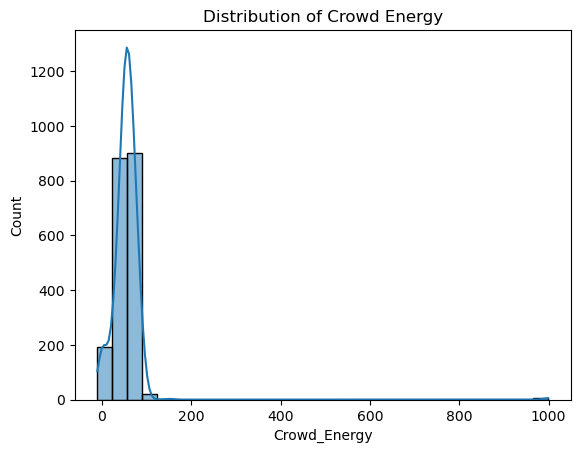

In [24]:

plt.figure()
sns.histplot(train_df["Crowd_Energy"], bins=30, kde=True)
plt.title("Distribution of Crowd Energy")
plt.show()

**The distribution of Crowd_Energy appears moderately spread with some extreme values,
indicating variability in audience response across shows.**

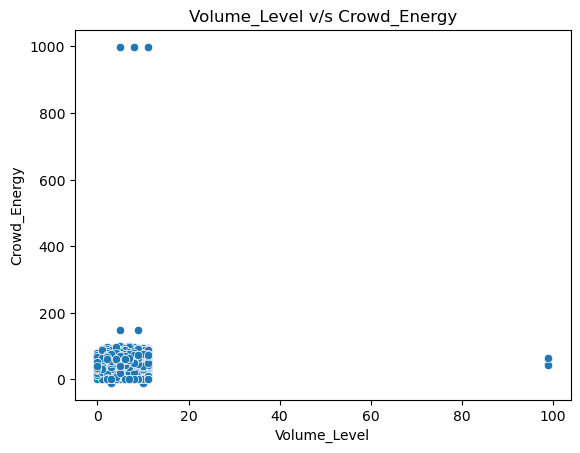

In [25]:
plt.figure()
sns.scatterplot(
    x = train_df["Volume_Level"],    y = train_df["Crowd_Energy"])
plt.title("Volume_Level v/s Crowd_Energy")
plt.show()

**This shows that crowd engages only at a specific volume ranges and the extreme volume levels are just noise or will not 
be helpful in training our model**

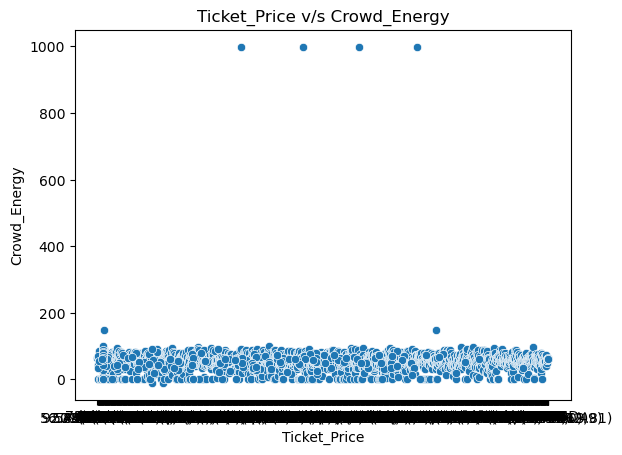

In [26]:
plt.figure()
sns.scatterplot(
    x = train_df["Ticket_Price"],
    y = train_df["Crowd_Energy"])
plt.title("Ticket_Price v/s Crowd_Energy")
plt.show()


**The scatter plot indicates that ticket price does not have a strong correlation with crowd energy.
Crowd energy remains largely similar across different price ranges, with a few extreme outliers.**

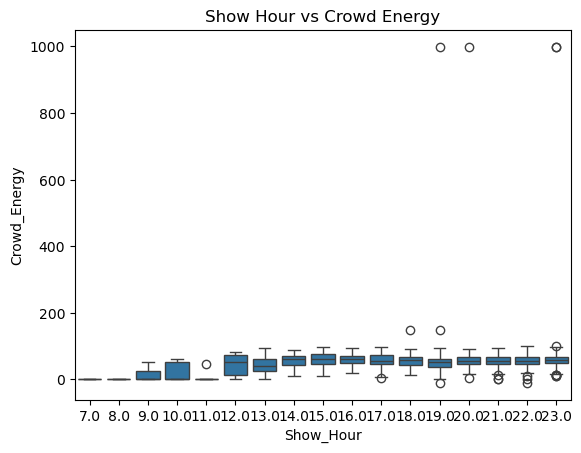

In [27]:
plt.figure()
sns.boxplot(
    x=train_df["Show_Hour"],
    y=train_df["Crowd_Energy"]
)
plt.title("Show Hour vs Crowd Energy")
plt.show()


**Later show hours tend to exhibit slightly higher median crowd energy,
indicating time-of-day effects on audience engagement.**

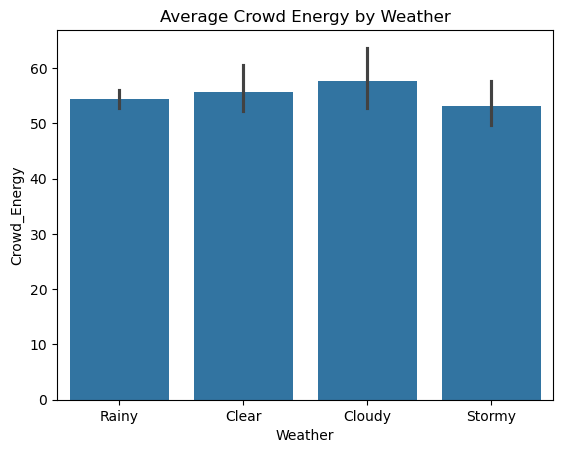

In [30]:
plt.figure()
sns.barplot(
    x=train_df["Weather"],
    y=train_df["Crowd_Energy"])
plt.title("Average Crowd Energy by Weather")
plt.show()

**Crowd energy varies across weather conditions, with indoor-friendly
conditions showing slightly higher average energy.**

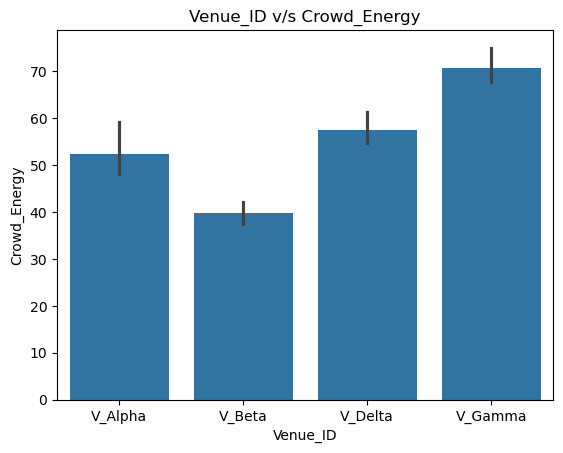

In [31]:
plt.figure()
sns.barplot( x = train_df["Venue_ID"],
             y = train_df["Crowd_Energy"])
plt.title("Venue_ID v/s Crowd_Energy")
plt.show()

**Different venues exhibit noticeable differences in average crowd energy,
suggesting venue-specific effects.**